# Intro

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #rozsireni pro kresleni v Jupyteru

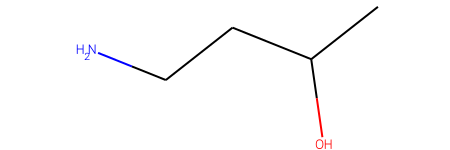

In [26]:
m = Chem.MolFromSmiles("NCCC(O)C")
m


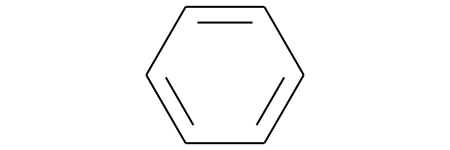

In [17]:
n = Chem.MolFromSmiles("c1ccccc1")
n

In [25]:
(Chem.AddHs(m)).GetNumAtoms()


17

In [22]:
m.GetNumAtoms()

6

In [27]:
Chem.MolToSmiles(m)

'CC(O)CCN'

# Vic molekul

In [50]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")

In [51]:
mols = [mol for mol in supp]


RDKit WARNING: [15:06:01]  S group DAT ignored on line 2516
RDKit WARNING: [15:06:01]  S group DAT ignored on line 2516
RDKit WARNING: [15:06:01]  S group DAT ignored on line 2516
RDKit WARNING: [15:06:01]  S group DAT ignored on line 2516
RDKit WARNING: [15:06:01]  S group DAT ignored on line 15552
RDKit WARNING: [15:06:01]  S group DAT ignored on line 15552
RDKit WARNING: [15:06:01]  S group DAT ignored on line 15552
RDKit WARNING: [15:06:01]  S group DAT ignored on line 15552
RDKit ERROR: [15:06:01] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:06:01] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:06:01] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:06:01] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:06:01]  S group GEN ignored on line 102860
RDKit ERROR: [15:06:01] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:06:01]  Unhand

RDKit ERROR: [15:06:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:06:02] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:06:02] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:06:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:06:02] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:06:02] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [15:06:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:06:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:06:02] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [15:06:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:06:02] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [15:06:02] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [15:06:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:06:02] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [15:06:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:06:03]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [15:06:03] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:06:03] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:06:03] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:06:03]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [15:06:03] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:06:03] ERROR: Could not sanitize molecule ending on line 1151592


In [53]:
len([x for x in mols if not x])

70

In [57]:
cleanMols = ([x for x in mols if x])
len(cleanMols)

7110

In [62]:
i=0
for mol in cleanMols:
    i+=mol.GetNumAtoms()
i

172446

In [68]:
rinfo = n.GetRingInfo()
dir(rinfo)

['AddRing',
 'AtomRings',
 'BondRings',
 'IsAtomInRingOfSize',
 'IsBondInRingOfSize',
 'MinAtomRingSize',
 'MinBondRingSize',
 'NumAtomRings',
 'NumBondRings',
 'NumRings',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [69]:
rinfo.NumRings()

1

In [71]:
rinfo.AtomRings()

((0, 5, 4, 3, 2, 1),)

In [73]:
n.GetAtomWithIdx(0).GetIsAromatic()

True

In [83]:
nAr = 0
nAl = 0
total = 0

num = len(cleanMols)
print(num)

for mol in cleanMols:
    ri = mol.GetRingInfo()
    #print(ri.NumRings())
    total += ri.NumRings()
    atoms = ri.AtomRings()
    #print(atoms)
    
    for ring in atoms:
        #print(ring[0])
        if mol.GetAtomWithIdx(ring[0]).GetIsAromatic():
            nAr+=1
        else:
            nAl+=1
print(total)
print(nAr/num, nAl/num) #prumerny pocet aromatickych resp. alifatickych kruhu na molekulu

7110
17539
1.529957805907173 0.9368495077355837


In [86]:
with open("drugbank_smiles.txt", "w") as f:

    for mol in cleanMols:
        sm = Chem.MolToSmiles(mol)
        inkey = Chem.MolToInchiKey(mol)
        print(sm +"\t"+ inkey, file=f)
    

RDKit ERROR: [15:40:58] Invalid InChI prefix in generating InChI Key
RDKit ERROR: [15:40:58] Invalid InChI prefix in generating InChI Key
